In [31]:
import pandas as pd

xkomDf = pd.read_csv('data_cleaned/produkty_xkom_szczegoly_full_cleaned.csv')
mediaexpertDf = pd.read_csv('data_cleaned/produkty_mediaexpert_szczegoly_full_cleaned.csv')
rtvagdDf = pd.read_csv('data_cleaned/produkty_rtv_agd_szczegoly_full_cleaned.csv')
rtvagdDf['Sklep'] = 'RTVAGD'
merged_df = pd.concat([xkomDf, mediaexpertDf, rtvagdDf], ignore_index=True)

In [32]:
xkomDf.head()

# Podstawowe statystki dla kolumn liczbowych
print('XKOM')
print(xkomDf[['Cena', 'RAM', 'Dysk SSD']].describe())
print('')
print('MEDIAEXPERT')
print(mediaexpertDf[['Cena', 'RAM', 'Dysk SSD']].describe())
print('')
print('RTVAGD')
print(rtvagdDf[['Cena', 'RAM', 'Dysk SSD']].describe())

XKOM
               Cena          RAM     Dysk SSD
count   4392.000000  4392.000000  1672.000000
mean    6498.102914    24.275046   499.521531
std     4148.839201    13.380167    79.608382
min      999.000000     4.000000   128.000000
25%     3899.000000    16.000000   512.000000
50%     5349.000000    16.000000   512.000000
75%     7499.000000    32.000000   512.000000
max    29249.000000   128.000000   960.000000

MEDIAEXPERT
               Cena          RAM  Dysk SSD
count   1243.000000  1242.000000       0.0
mean    5615.762172    16.785829       NaN
std     3871.528257     9.147067       NaN
min      898.000000     4.000000       NaN
25%     2999.990000     8.000000       NaN
50%     4499.000000    16.000000       NaN
75%     6799.985000    16.000000       NaN
max    23999.990000    64.000000       NaN

RTVAGD
               Cena          RAM     Dysk SSD
count   1428.000000  1428.000000  1428.000000
mean    5542.013305    16.347339   647.170868
std     3365.079325     7.775932   

In [33]:

# Średnia cena w zależności od ilości RAM
print('XKOM')
print(xkomDf.groupby('RAM')['Cena'].mean())
print('')
print('MEDIAEXPERT')
print(mediaexpertDf.groupby('RAM')['Cena'].mean())
print('')
print('RTVAGD')
print(rtvagdDf.groupby('RAM')['Cena'].mean())

XKOM
RAM
4       1049.000000
8       3347.061404
12      2999.000000
16      5179.027523
18     14449.000000
24      7826.926829
32      7132.894531
36     18439.000000
48     16853.166667
64     13529.681818
128    26936.500000
Name: Cena, dtype: float64

MEDIAEXPERT
RAM
4.0      1411.681818
8.0      3200.176926
12.0     2139.983333
16.0     5393.365344
18.0    11249.990000
24.0     8604.998824
32.0     9584.127394
36.0    16574.247500
48.0    19719.000000
64.0    15427.147692
Name: Cena, dtype: float64

RTVAGD
RAM
4      1670.666667
8      3534.748387
12     2649.000000
16     5269.320132
18    12399.000000
24     9467.750000
32     9729.460526
36    17141.857143
48    18899.000000
64    17627.571429
Name: Cena, dtype: float64


In [34]:

# Średnia cena w zależności od systemu operacyjnego
print('XKOM')
print(xkomDf.groupby('System operacyjny')['Cena'].mean())
print('')
print('MEDIAEXPERT')
print(mediaexpertDf.groupby('System operacyjny')['Cena'].mean())
print('')
print('RTVAGD')
print(rtvagdDf.groupby('System operacyjny')['Cena'].mean())

XKOM
System operacyjny
Brak                        4940.257485
Chrome OS                   1824.000000
Windows 11 Home             5222.777162
Windows 11 Professional     7402.953765
macOS Sonoma               11847.497409
Name: Cena, dtype: float64

MEDIAEXPERT
System operacyjny
Brak                       4771.191230
Chrome OS                  2246.875714
Linux                      5759.560000
Windows 10                 5097.830000
Windows 11 Home            5410.887773
Windows 11 Professional    6572.642349
macOS Sonoma               8553.336667
Name: Cena, dtype: float64

RTVAGD
System operacyjny
Brak                       4258.629870
Chrome OS                  1837.181818
Windows 10                 4602.818182
Windows 11 Home            5165.776923
Windows 11 Professional    6200.747801
macOS Sonoma               8206.807947
Name: Cena, dtype: float64


In [35]:

# Średnia cena w zależności od systemu operacyjnego
print('XKOM')
print(xkomDf.groupby('Firma procesora')['Cena'].mean())
print('')
print('MEDIAEXPERT')
print(mediaexpertDf.groupby('Firma procesora')['Cena'].mean())
print('')
print('RTVAGD')
print(rtvagdDf.groupby('Firma procesora')['Cena'].mean())

XKOM
Firma procesora
AMD          5217.419505
Apple       11847.497409
Brak         3649.000000
Inne         1999.000000
Intel        6342.535276
MediaTek     1074.000000
Qualcomm     6823.510204
Name: Cena, dtype: float64

MEDIAEXPERT
Firma procesora
AMD         4920.345858
Apple       8553.336667
Intel       5527.970598
MediaTek    1759.330000
Qualcomm    6128.449630
Name: Cena, dtype: float64

RTVAGD
Firma procesora
AMD         4626.937500
Apple       8206.807947
Inne        6049.000000
Intel       5464.116516
MediaTek    1515.666667
Qualcomm    6256.500000
Name: Cena, dtype: float64


Średnia cena produktów w zależności od sklepu:
Sklep
MediaExpert    5615.762172
RTVAGD         5542.013305
xkom           6498.102914
Name: Cena, dtype: float64


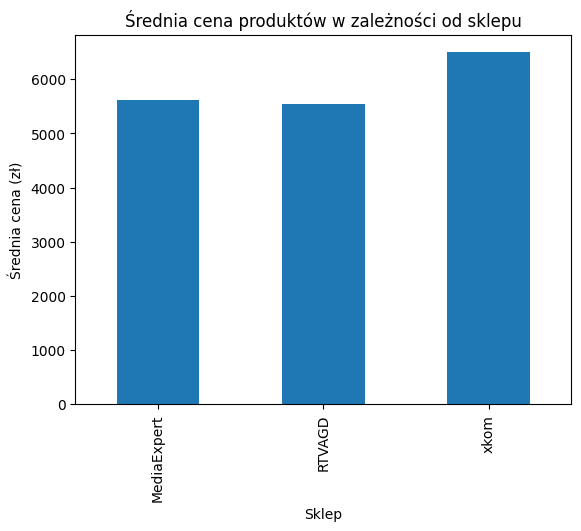

In [36]:
avg_price_per_store = merged_df.groupby('Sklep')['Cena'].mean()

print("Średnia cena produktów w zależności od sklepu:")
print(avg_price_per_store)

import matplotlib.pyplot as plt

avg_price_per_store.plot(kind='bar', title='Średnia cena produktów w zależności od sklepu')
plt.xlabel('Sklep')
plt.ylabel('Średnia cena (zł)')
plt.show()

In [37]:
most_expensive_per_store = merged_df.loc[merged_df.groupby('Sklep')['Cena'].idxmax()]
print("Najdroższe produkty w każdym sklepie:")
most_expensive_per_store

Najdroższe produkty w każdym sklepie:


,Tytuł,Cena,Sklep,Procesor,RAM,Grafika,Typ ekranu,Dysk,Dysk SSD,Dysk SSD.1,System operacyjny,Firma procesora,Karta graficzna:,Ekran,Dysk HDD:,Ekran:,Grafika:
5202,"Laptop DELL Alienware X15 15R2-4698 15.6"" 360H...",23999.99,MediaExpert,Intel Core i7-12700H,32.0,NaN,NaN,NaN,NaN,NaN,Windows 11 Home,Intel,NVIDIA GeForce RTX 3080 Ti + Intel Iris Xe Gra...,15.6,NaN,NaN,NaN
6520,Laptop gamingowy MSI Titan 18 HX A14VIG-065PL ...,26399.00,RTVAGD,Intel® Core™ i9 14gen 14900HX,64.0,NaN,NaN,NaN,4096.0,NaN,Windows 11 Home,Intel,NaN,NaN,NaN,"18 "", 3840 x 2400 pikseli 120 Hz",NVIDIA® GeForce RTX™ 4090 + Intel UHD Graphics
1207,Apple MacBook Pro M4 Max/128GB/2TB/Mac OS Gwie...,29249.00,xkom,Apple M4 Max,128.0,Apple M4 Max [40 rdzeni],"Błyszczący, mini-LED, Liquid Retina XDR",2TB,NaN,2048.0,macOS Sonoma,Apple,NaN,NaN,NaN,NaN,NaN


In [38]:
merged_df

,Tytuł,Cena,Sklep,Procesor,RAM,Grafika,Typ ekranu,Dysk,Dysk SSD,Dysk SSD.1,System operacyjny,Firma procesora,Karta graficzna:,Ekran,Dysk HDD:,Ekran:,Grafika:
0,ASUS Vivobook 15 R5‑7530U/16GB/512/Win11,2199.0,xkom,AMD Ryzen™ 5 7530U,16.0,AMD Radeon™ Graphics,"Matowy, LED, IPS",512,512.0,512.0,Windows 11 Home,AMD,NaN,NaN,NaN,NaN,NaN
1,Lenovo IdeaPad Slim 3‑15 i5‑12450H/16GB/512/Win11,2399.0,xkom,Intel® Core™ i5-12450H,16.0,Intel UHD Graphics,"Matowy, LED, IPS",512,512.0,512.0,Windows 11 Home,Intel,NaN,NaN,NaN,NaN,NaN
2,Acer Chromebook 315 N4500/8GB/128/FHD ChromeOS,1299.0,xkom,Intel® Celeron N4500,8.0,Intel UHD Graphics,"Matowy, LED, IPS",128,128.0,128.0,Chrome OS,Intel,NaN,NaN,NaN,NaN,NaN
3,ASUS Vivobook 15 i5‑1235U/16GB/512/Win11,2299.0,xkom,Intel® Core™ i5-1235U,16.0,Intel Iris Xe Graphics,"Matowy, LED, IPS",512,512.0,512.0,Windows 11 Home,Intel,NaN,NaN,NaN,NaN,NaN
4,HP 250 G9 i5‑1235U/16GB/512/Win11,1999.0,xkom,Intel® Core™ i5-1235U,16.0,Intel UHD,"Matowy, LED, VA",512,512.0,512.0,Windows 11 Home,Intel,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7058,Laptop gamingowy ASUS ROG Strix Scar 18 2024 G...,14175.0,RTVAGD,Intel® Core™ i9 14gen 14900HX,32.0,NaN,NaN,NaN,2048.0,NaN,Windows 11 Professional,Intel,NaN,NaN,NaN,"18 "", 2560 x 1600 pikseli 240 Hz",NVIDIA® Geforce RTX™ 4090 + Intel UHD Graphics
7059,"Laptop biznesowy Dell XPS 14 9440-7715 14,5"" 1...",13500.0,RTVAGD,Intel® Core™ Ultra 7 14gen 155H,32.0,NaN,NaN,NaN,1024.0,NaN,Windows 11 Professional,Intel,NaN,NaN,NaN,"14,5 "", ekran dotykowy 3200 x 2000 pikseli 120 Hz",NVIDIA® GeForce RTX 4050 + Intel Arc Graphics
7060,Laptop gamingowy MSI Raider GE78 HX 14VHG-626P...,12600.0,RTVAGD,Intel® Core™ i9 14gen 14900HX,32.0,NaN,NaN,NaN,2048.0,NaN,Windows 11 Home,Intel,NaN,NaN,NaN,"17 "", 2560 x 1600 pikseli 240 Hz",NVIDIA® GeForce RTX™ 4080 + Intel UHD Graphics
7061,Laptop gamingowy MSI Katana 15 B13VGK-1436XPL ...,6930.0,RTVAGD,Intel® Core™ i9 13gen 13900H,16.0,NaN,NaN,NaN,1024.0,NaN,Brak,Intel,NaN,NaN,NaN,"15,6 "", 1920 x 1080 pikseli 144 Hz",NVIDIA® GeForce RTX™ 4070 + Intel Iris Xe Grap...


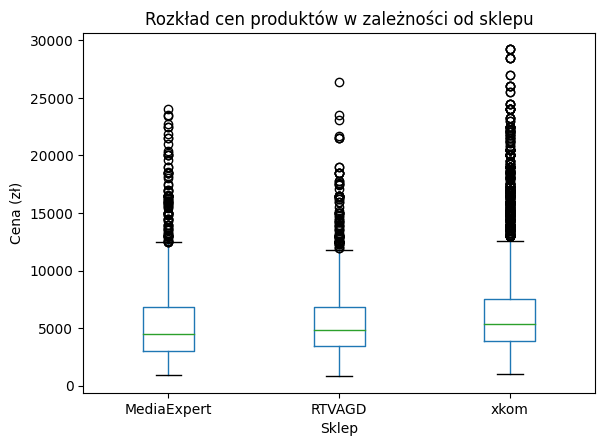

In [39]:
from matplotlib import pyplot as plt

merged_df.boxplot(column='Cena', by='Sklep', grid=False)
plt.title('Rozkład cen produktów w zależności od sklepu')
plt.suptitle('')
plt.xlabel('Sklep')
plt.ylabel('Cena (zł)')
plt.show()

In [ ]:
# Opis analizy:
# Mediana ceny wygląda na podobna, ale widzimy że mediana w xkom jest wyższa niż w pozostałych sklepach.
# Wartość maksymalna w xkom jest znacząco wyższa niż w pozostałych sklepach. Co może oznaczać że sklep xkom skupia się na sprzęcie klasy premium. RTVAGD i MediaExpert są bardziej zróznicowane cenowo, mają wiecej produktów w różnych przedziałach cenowych. Te sklepy mają podobny rozkład cen sugeruje silną konkuręcje w pozyskiwaniu klientów w tych sklepach.

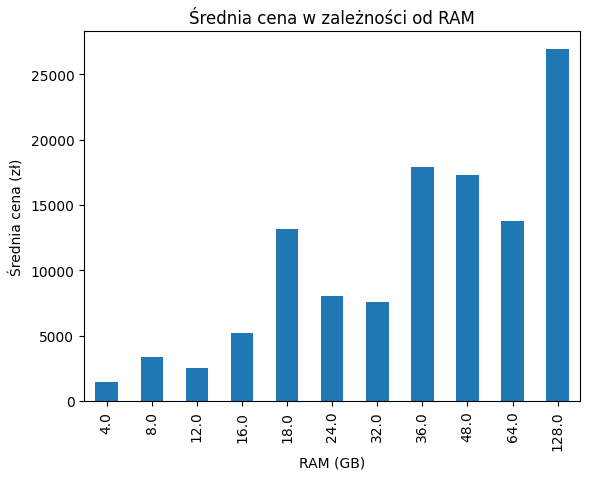

In [40]:
# Średnia cena w zależności od RAM
ram_price = merged_df.groupby('RAM')['Cena'].mean()
ram_price.plot(kind='bar', title='Średnia cena w zależności od RAM')
plt.xlabel('RAM (GB)')
plt.ylabel('Średnia cena (zł)')
plt.show()

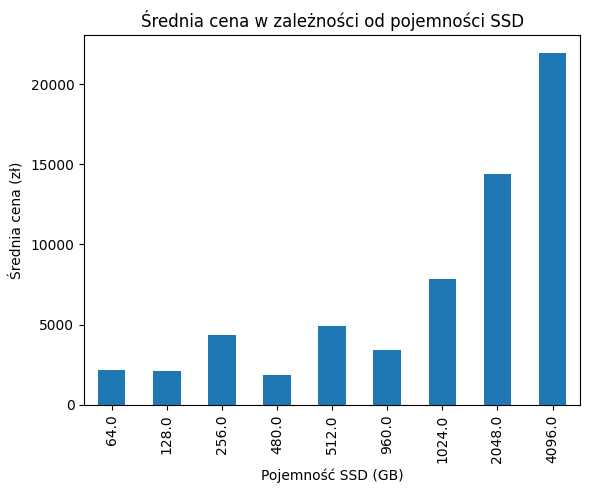

In [41]:
# Średnia cena w zależności od Dysku SSD
ssd_price = merged_df.groupby('Dysk SSD')['Cena'].mean()
ssd_price.plot(kind='bar', title='Średnia cena w zależności od pojemności SSD')
plt.xlabel('Pojemność SSD (GB)')
plt.ylabel('Średnia cena (zł)')
plt.show()

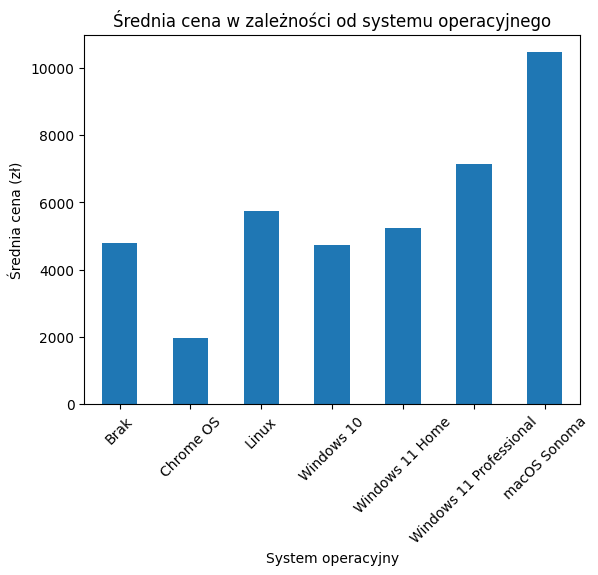

In [42]:
# Średnia cena w zależności od systemu operacyjnego
os_price = merged_df.groupby('System operacyjny')['Cena'].mean()
os_price.plot(kind='bar', title='Średnia cena w zależności od systemu operacyjnego')
plt.xlabel('System operacyjny')
plt.ylabel('Średnia cena (zł)')
plt.xticks(rotation=45)
plt.show()

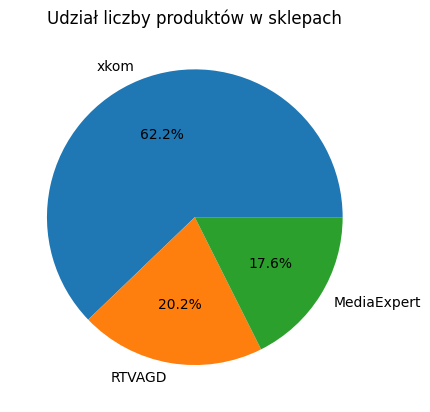

In [43]:
# Rozkład liczby produktów w sklepach
product_distribution = merged_df['Sklep'].value_counts()
product_distribution.plot(kind='pie', autopct='%1.1f%%', title='Udział liczby produktów w sklepach')
plt.ylabel('')
plt.show()
 # Widzimy że najwięcej produktów jest w xkom, co może oznaczać że sklep ten ma największy wybór produktów.

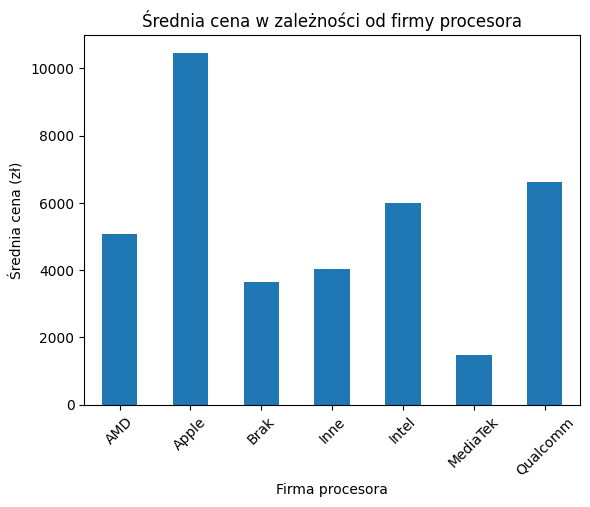

In [44]:
# Średnia cena w zależności od firmy procesora
cpu_price = merged_df.groupby('Firma procesora')['Cena'].mean()
cpu_price.plot(kind='bar', title='Średnia cena w zależności od firmy procesora')
plt.xlabel('Firma procesora')
plt.ylabel('Średnia cena (zł)')
plt.xticks(rotation=45)
plt.show()
# Tutaj mamy potwierdzenie że produkty z procesorami Apple są najdroższe
# Intel jeśli chodzi o średnie ceny produktow są wyższe niż z procesorami AMD. Intel jest popularny w produktach średnich i produktach premimum co może wpływać na jego zawyżoną cene
# Procesory Qulacomm mają wyższą średnią cene względem innych procesorów (oprocz Apple) co może wynikać z ich stosowania w nowoczesnych urządzeniach (npm ARM)

In [67]:
# budget_laptops = merged_df[merged_df['Cena'] < 2000]
# print("Laptopy budżetowe:")
# print(budget_laptops[['Cena', 'Sklep', 'Firma procesora', 'RAM', 'Dysk SSD']])



,Tytuł,Cena,Sklep,Procesor,RAM,Grafika,Typ ekranu,Dysk,Dysk SSD,Dysk SSD.1,System operacyjny,Firma procesora,Karta graficzna:,Ekran,Dysk HDD:,Ekran:,Grafika:
0,ASUS Vivobook 15 R5‑7530U/16GB/512/Win11,2199.0,xkom,AMD Ryzen™ 5 7530U,16.0,AMD Radeon™ Graphics,"Matowy, LED, IPS",512,512.0,512.0,Windows 11 Home,AMD,NaN,NaN,NaN,NaN,NaN
1,Lenovo IdeaPad Slim 3‑15 i5‑12450H/16GB/512/Win11,2399.0,xkom,Intel® Core™ i5-12450H,16.0,Intel UHD Graphics,"Matowy, LED, IPS",512,512.0,512.0,Windows 11 Home,Intel,NaN,NaN,NaN,NaN,NaN
2,Acer Chromebook 315 N4500/8GB/128/FHD ChromeOS,1299.0,xkom,Intel® Celeron N4500,8.0,Intel UHD Graphics,"Matowy, LED, IPS",128,128.0,128.0,Chrome OS,Intel,NaN,NaN,NaN,NaN,NaN
3,ASUS Vivobook 15 i5‑1235U/16GB/512/Win11,2299.0,xkom,Intel® Core™ i5-1235U,16.0,Intel Iris Xe Graphics,"Matowy, LED, IPS",512,512.0,512.0,Windows 11 Home,Intel,NaN,NaN,NaN,NaN,NaN
4,HP 250 G9 i5‑1235U/16GB/512/Win11,1999.0,xkom,Intel® Core™ i5-1235U,16.0,Intel UHD,"Matowy, LED, VA",512,512.0,512.0,Windows 11 Home,Intel,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7058,Laptop gamingowy ASUS ROG Strix Scar 18 2024 G...,14175.0,RTVAGD,Intel® Core™ i9 14gen 14900HX,32.0,NaN,NaN,NaN,2048.0,NaN,Windows 11 Professional,Intel,NaN,NaN,NaN,"18 "", 2560 x 1600 pikseli 240 Hz",NVIDIA® Geforce RTX™ 4090 + Intel UHD Graphics
7059,"Laptop biznesowy Dell XPS 14 9440-7715 14,5"" 1...",13500.0,RTVAGD,Intel® Core™ Ultra 7 14gen 155H,32.0,NaN,NaN,NaN,1024.0,NaN,Windows 11 Professional,Intel,NaN,NaN,NaN,"14,5 "", ekran dotykowy 3200 x 2000 pikseli 120 Hz",NVIDIA® GeForce RTX 4050 + Intel Arc Graphics
7060,Laptop gamingowy MSI Raider GE78 HX 14VHG-626P...,12600.0,RTVAGD,Intel® Core™ i9 14gen 14900HX,32.0,NaN,NaN,NaN,2048.0,NaN,Windows 11 Home,Intel,NaN,NaN,NaN,"17 "", 2560 x 1600 pikseli 240 Hz",NVIDIA® GeForce RTX™ 4080 + Intel UHD Graphics
7061,Laptop gamingowy MSI Katana 15 B13VGK-1436XPL ...,6930.0,RTVAGD,Intel® Core™ i9 13gen 13900H,16.0,NaN,NaN,NaN,1024.0,NaN,Brak,Intel,NaN,NaN,NaN,"15,6 "", 1920 x 1080 pikseli 144 Hz",NVIDIA® GeForce RTX™ 4070 + Intel Iris Xe Grap...


In [75]:
budget_laptops = merged_df[merged_df['Cena'] < 2000]
budget_laptops


,Tytuł,Cena,Sklep,Procesor,RAM,Grafika,Typ ekranu,Dysk,Dysk SSD,Dysk SSD.1,System operacyjny,Firma procesora,Karta graficzna:,Ekran,Dysk HDD:,Ekran:,Grafika:
2,Acer Chromebook 315 N4500/8GB/128/FHD ChromeOS,1299.0,xkom,Intel® Celeron N4500,8.0,Intel UHD Graphics,"Matowy, LED, IPS",128,128.0,128.0,Chrome OS,Intel,NaN,NaN,NaN,NaN,NaN
4,HP 250 G9 i5‑1235U/16GB/512/Win11,1999.0,xkom,Intel® Core™ i5-1235U,16.0,Intel UHD,"Matowy, LED, VA",512,512.0,512.0,Windows 11 Home,Intel,NaN,NaN,NaN,NaN,NaN
12,Acer Extensa i5‑1235U/16GB/512/Win11 Szary,1999.0,xkom,Intel® Core™ i5-1235U,16.0,Intel UHD,"Matowy, LED, IPS",512,512.0,512.0,Windows 11 Home,Intel,NaN,NaN,NaN,NaN,NaN
19,MSI Modern 14 i5‑1235U/16GB/512/Win11,1949.0,xkom,Intel® Core™ i5-1235U,16.0,Intel Iris Xe Graphics,"Matowy, LED, IPS",512,512.0,512.0,Windows 11 Home,Intel,NaN,NaN,NaN,NaN,NaN
169,Acer Aspire 3 i3‑1215U/8GB/512/Win11,1949.0,xkom,Intel® Core™ i3-1215U,8.0,Intel UHD Graphics,"Matowy, LED, IPS",512,512.0,512.0,Windows 11 Home,Intel,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6957,Laptop chromebook Acer Chromebook 315 CB315-4H...,1999.0,RTVAGD,Intel® Celeron® N5100,8.0,NaN,NaN,NaN,128.0,NaN,Chrome OS,Intel,NaN,NaN,NaN,"15,6 "", 1920 x 1080 pikseli 60 Hz",Intel® UHD Graphics
6982,"Laptop ASUS E510KA-EJ082WS 15,6"" Celeron N4500...",1399.0,RTVAGD,Intel® Celeron® N4500,4.0,NaN,NaN,NaN,128.0,NaN,Windows 11 Home,Intel,NaN,NaN,NaN,"15,6 "", 1920 x 1080 pikseli",Intel® UHD Graphics
6983,"Laptop Lenovo V15 IML 15,6"" i3-10110U 8GB RAM ...",1799.0,RTVAGD,Intel® Core™ i3 10gen 10110U,8.0,NaN,NaN,NaN,256.0,NaN,Brak,Intel,NaN,NaN,NaN,"15,6 "", 1920 x 1080 pikseli",Intel® UHD Graphics
7013,Laptop chromebook Acer Chromebook CB315-3H-C2E...,1499.0,RTVAGD,Intel® Celeron® N4020,8.0,NaN,NaN,NaN,128.0,NaN,Chrome OS,Intel,NaN,NaN,NaN,"15,6 "", 1920 x 1080 pikseli 60 Hz",Intel® UHD Graphics 600


In [79]:
print("Średnia cena w zależności od ilości RAM:")
print(budget_laptops.groupby('RAM')['Cena'].mean())

print("--------------------------------------------------")
print("Średnia cena w zależności od systemu operacyjnego:")
print(budget_laptops.groupby('System operacyjny')['Cena'].mean())
print("--------------------------------------------------")
print("Średnia cena w zależności od firmy procesora:")
print(budget_laptops.groupby('Firma procesora')['Cena'].mean())


Średnia cena w zależności od ilości RAM:
RAM
4.0     1258.134146
8.0     1667.010749
12.0    1999.980000
16.0    1856.240000
Name: Cena, dtype: float64
--------------------------------------------------
Średnia cena w zależności od systemu operacyjnego:
System operacyjny
Brak                       1694.857174
Chrome OS                  1471.346757
Windows 10                 1516.436500
Windows 11 Home            1679.496412
Windows 11 Professional    1299.445000
Name: Cena, dtype: float64
--------------------------------------------------
Średnia cena w zależności od firmy procesora:
Firma procesora
AMD         1733.097237
Inne        1999.000000
Intel       1621.307568
MediaTek    1219.198000
Qualcomm    1499.000000
Name: Cena, dtype: float64


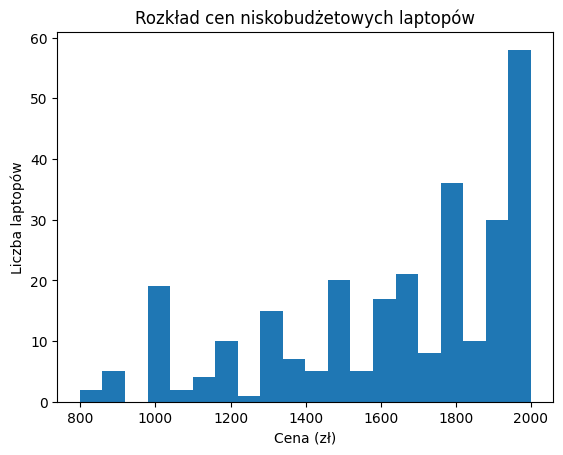

In [80]:
import matplotlib.pyplot as plt

budget_laptops['Cena'].plot(kind='hist', bins=20, title='Rozkład cen niskobudżetowych laptopów')
plt.xlabel('Cena (zł)')
plt.ylabel('Liczba laptopów')
plt.show()

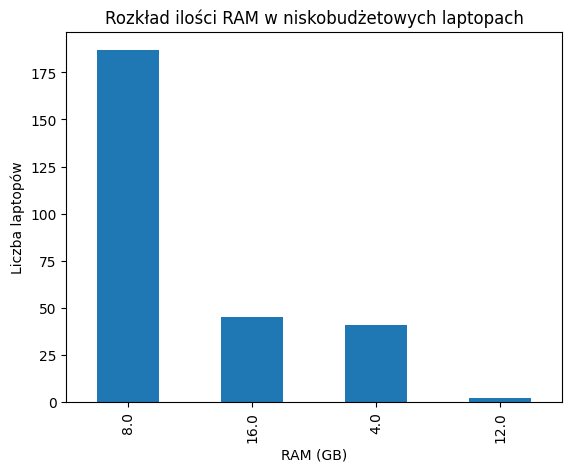

In [81]:
budget_laptops['RAM'].value_counts().plot(kind='bar', title='Rozkład ilości RAM w niskobudżetowych laptopach')
plt.xlabel('RAM (GB)')
plt.ylabel('Liczba laptopów')
plt.show()

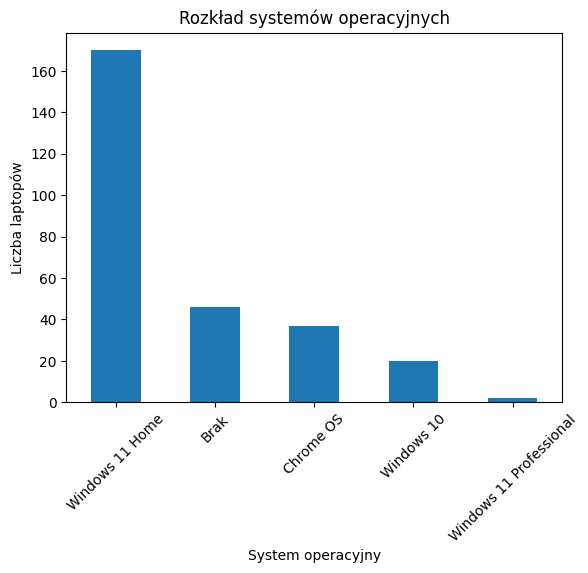

In [82]:
budget_laptops['System operacyjny'].value_counts().plot(kind='bar', title='Rozkład systemów operacyjnych')
plt.xlabel('System operacyjny')
plt.ylabel('Liczba laptopów')
plt.xticks(rotation=45)
plt.show()

In [83]:
print("Liczba niskobudżetowych laptopów w poszczególnych sklepach:")
print(budget_laptops['Sklep'].value_counts())

Liczba niskobudżetowych laptopów w poszczególnych sklepach:
Sklep
MediaExpert    104
RTVAGD         101
xkom            70
Name: count, dtype: int64


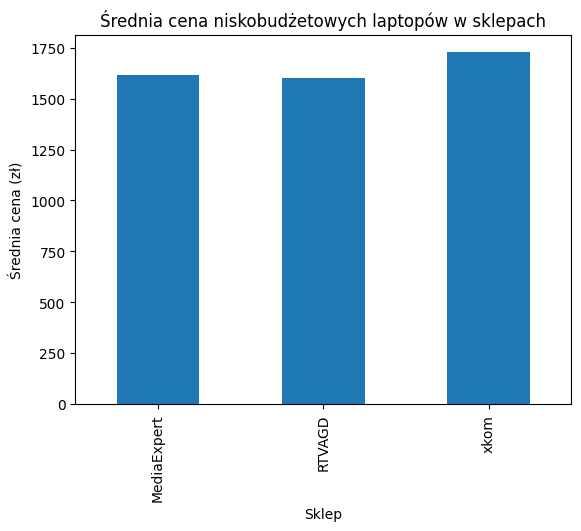

In [84]:
budget_laptops.groupby('Sklep')['Cena'].mean().plot(kind='bar', title='Średnia cena niskobudżetowych laptopów w sklepach')
plt.xlabel('Sklep')
plt.ylabel('Średnia cena (zł)')
plt.show()

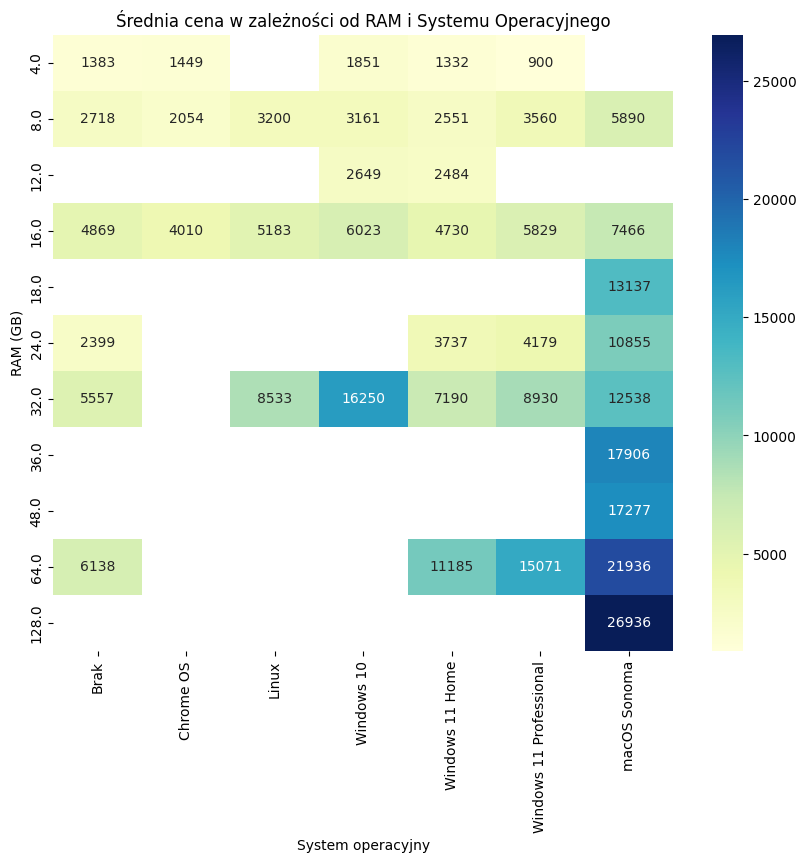

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

pivot_table = merged_df.pivot_table(values='Cena', index='RAM', columns='System operacyjny', aggfunc='mean')

# Tworzenie heatmapy
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt=".0f")
plt.title("Średnia cena w zależności od RAM i Systemu Operacyjnego")
plt.ylabel("RAM (GB)")
plt.xlabel("System operacyjny")
plt.show()

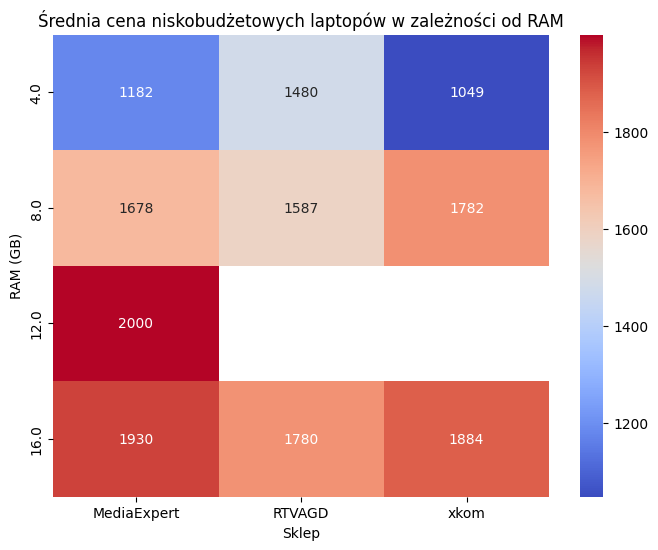

In [89]:
budget_laptops = merged_df[merged_df['Cena'] < 2000]

# Grupowanie danych i wyliczanie średniej ceny
budget_pivot = budget_laptops.pivot_table(values='Cena', index='RAM', columns='Sklep', aggfunc='mean')

# Tworzenie heatmapy
plt.figure(figsize=(8, 6))
sns.heatmap(budget_pivot, annot=True, cmap='coolwarm', fmt=".0f")
plt.title("Średnia cena niskobudżetowych laptopów w zależności od RAM")
plt.ylabel("RAM (GB)")
plt.xlabel("Sklep")
plt.show()

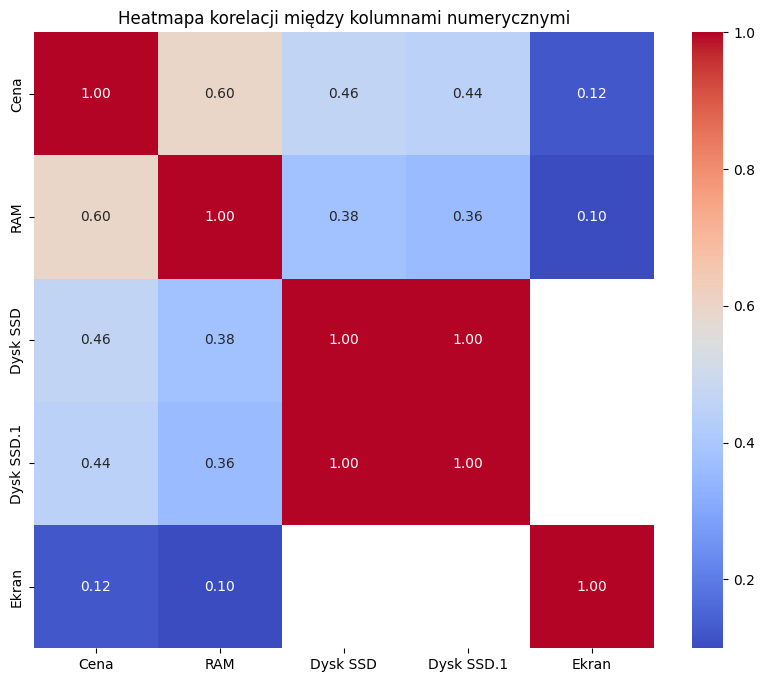

In [91]:
numeric_data = merged_df.select_dtypes(include=['number'])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmapa korelacji")
plt.show()